# Iris Classification
***

## Setup

***

In [1]:
#numerical arrays
import numpy as np

#data frames
import pandas as pd

#plotting
import matplotlib.pyplot as plt

# logistic regression
import sklearn.linear_model as lm

# k nearest neighbours
import sklearn.neighbors as nei

# helper functions
import sklearn.model_selection as mod

# logostoc regression
import sklearn.linear_model as lm

#stats plots
import seaborn as sns



In [2]:
#standard plot size
plt.rcParams['figure.figsize'] = (15,10)

#color scheme
plt.style.use('ggplot')

## The Iris dataset

***

In [3]:
#Load data set
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv')

In [4]:
#dataset top 10 row
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
#summary stats
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualise

***

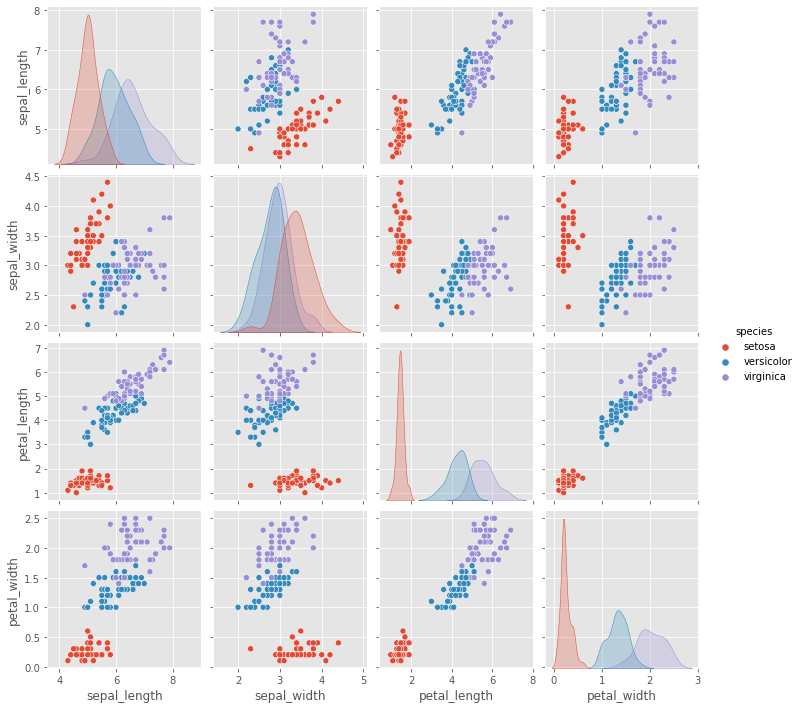

In [6]:
## scatter plot and kdes
sns.pairplot(df,hue='species');

## Two Dimensions

***

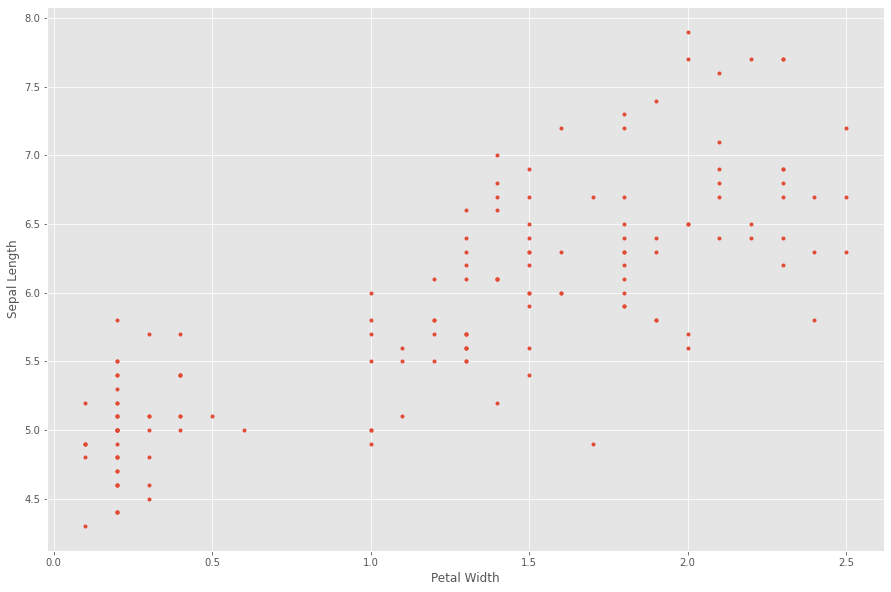

In [7]:
#new fig
fig, ax = plt.subplots()

#scatter plot
ax.plot(df['petal_width'],df['sepal_length'],'.')

#set axis labels
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length');

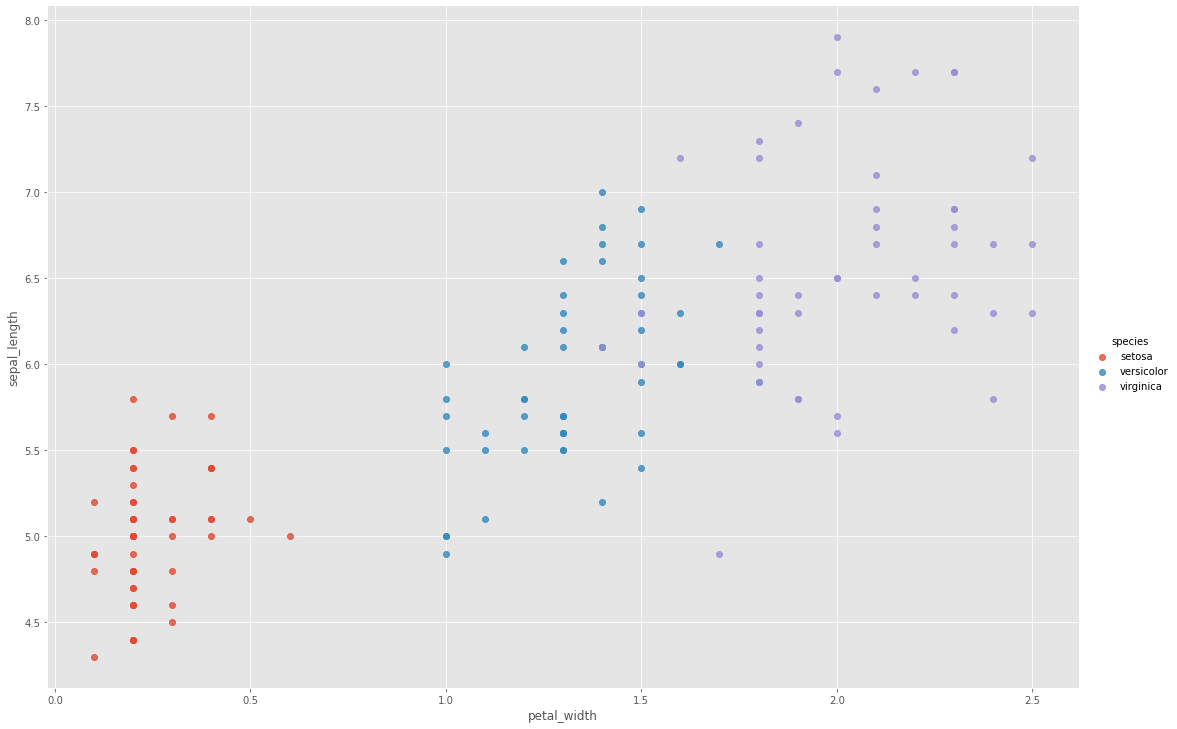

In [8]:
type = False

sns.lmplot(x='petal_width',y='sepal_length',hue='species',data=df,fit_reg=type,height=10,aspect=1.5);

## Using pyplot

***

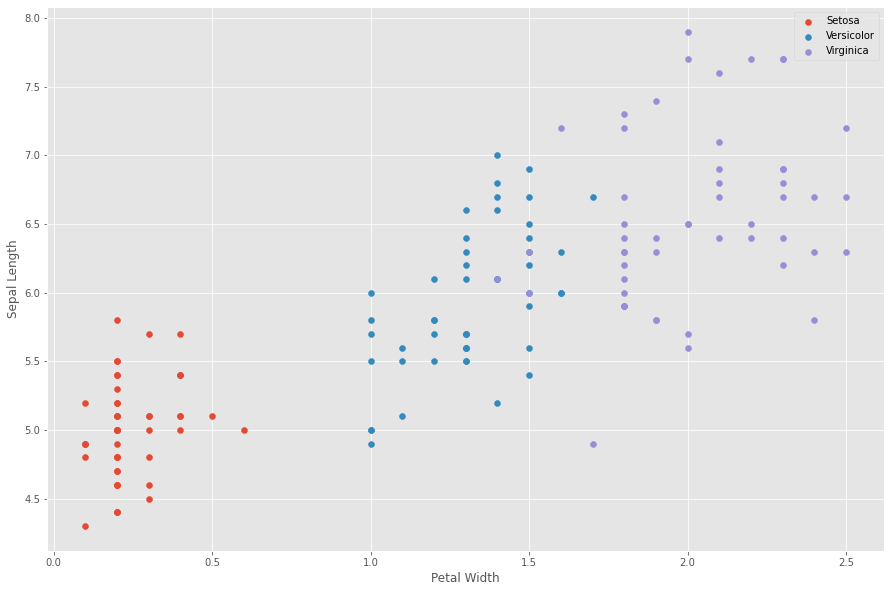

In [9]:
#segreate data
setos = df[df['species']=='setosa']
versi = df[df['species']=='versicolor']
virgi = df[df['species']=='virginica']

#new plot
fig,ax = plt.subplots()

#scatterplots
ax.scatter(setos['petal_width'],setos['sepal_length'],label='Setosa')
ax.scatter(versi['petal_width'],versi['sepal_length'],label='Versicolor')
ax.scatter(virgi['petal_width'],virgi['sepal_length'],label='Virginica')

#legend
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.legend();

In [10]:
df['species'] == 'virginica'

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [11]:
df[df['species']=='virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


## Use groupby()

***

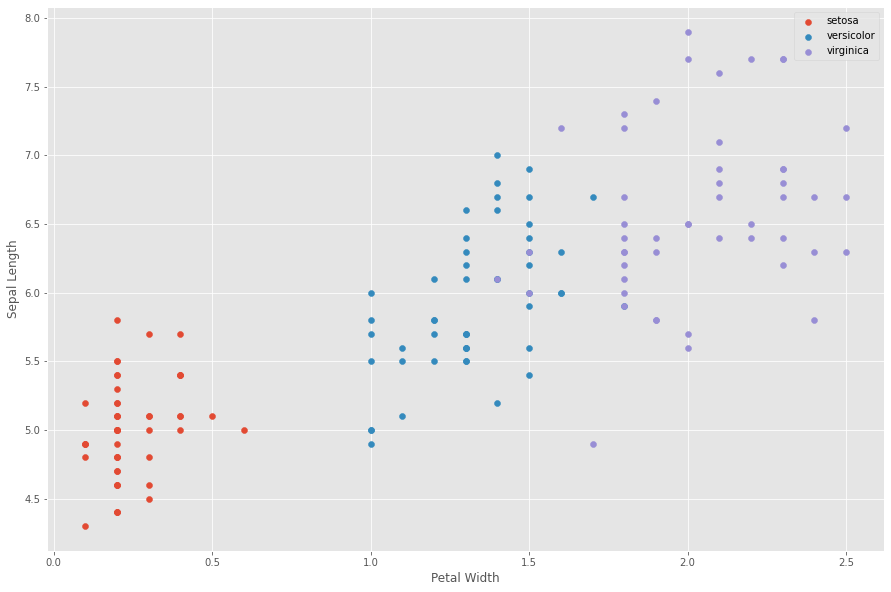

In [12]:
fig, ax = plt.subplots()

for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'],data['sepal_length'],label=species)
    

#legend
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.legend();

In [13]:
x = df.groupby('species')
x

In [14]:
x.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [15]:
# looping through group by
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like: \n{j[:3]}")
    print()


i is: 'setosa'
j looks like: 
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


i is: 'versicolor'
j looks like: 
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor


i is: 'virginica'
j looks like: 
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica



## Test and Train Split 

***

In [16]:
#split data frame in two
train, test = mod.train_test_split(df)
#25% SPLIT BE DEFAULT

In [17]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,virginica
116,6.5,3.0,5.5,1.8,virginica
75,6.6,3.0,4.4,1.4,versicolor
68,6.2,2.2,4.5,1.5,versicolor
25,5.0,3.0,1.6,0.2,setosa


In [18]:
train.index

Int64Index([105, 116,  75,  68,  25,  80,  99,   4,  41, 146,
            ...
             23,  63,  17,  73,  51,  65,  53, 145,   0,  50],
           dtype='int64', length=112)

In [19]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
92,5.8,2.6,4.0,1.2,versicolor
136,6.3,3.4,5.6,2.4,virginica
93,5.0,2.3,3.3,1.0,versicolor
44,5.1,3.8,1.9,0.4,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [20]:
print(len(train))
print(len(test))
len(test)+len(train)

112
38


150

## Two Dimensions: Test Train Split

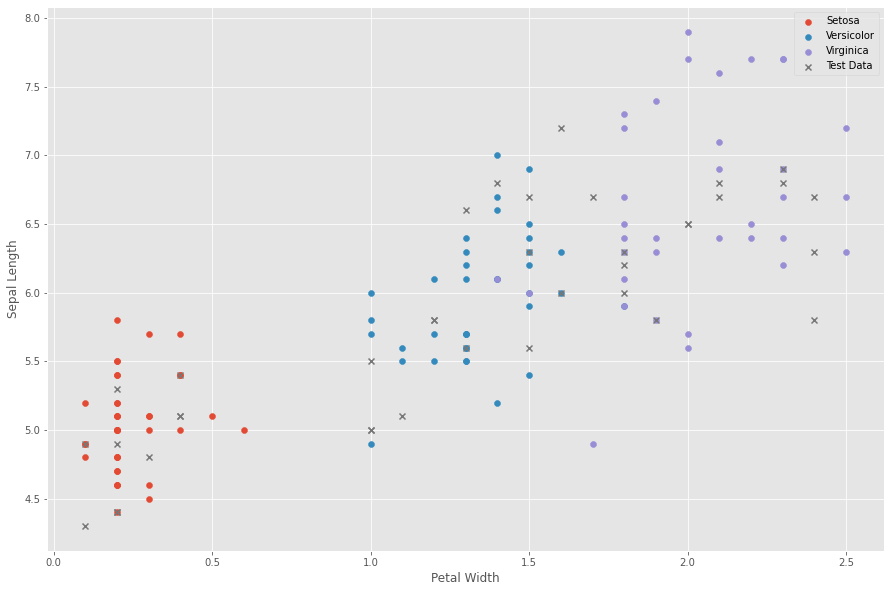

In [21]:
#segreate data
setos = train[train['species']=='setosa']
versi = train[train['species']=='versicolor']
virgi = train[train['species']=='virginica']

#new plot
fig,ax = plt.subplots()

#scatterplots
ax.scatter(setos['petal_width'],setos['sepal_length'],label='Setosa')
ax.scatter(versi['petal_width'],versi['sepal_length'],label='Versicolor')
ax.scatter(virgi['petal_width'],virgi['sepal_length'],label='Virginica')

#scatter for test data
ax.scatter(test['petal_width'],test['sepal_length'],label='Test Data',marker='x')
#legend
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.legend();

### Two Dimensions Inputs and Output

In [22]:
#give inputs and outputs convient names
inputs, outputs = train[['sepal_length', 'petal_width']],train['species']

In [23]:
#peek at inputs
inputs.head()

,sepal_length,petal_width
105,7.6,2.1
116,6.5,1.8
75,6.6,1.4
68,6.2,1.5
25,5.0,0.2


In [24]:
#peek at outputs
outputs.head()

105     virginica
116     virginica
75     versicolor
68     versicolor
25         setosa
Name: species, dtype: object

## Two Dimensions:Logisitic Regression

*https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

***

In [25]:
#create new classifier
lre = lm.LogisticRegression(random_state=0)

#train the classifier on the data
lre.fit(inputs,outputs)

LogisticRegression(random_state=0)

In [26]:
#ask classifier to classify the test data
predictions = lre.predict(test[['sepal_length','petal_width']])
predictions

array(['versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [27]:
predictions == test['species']

92      True
136     True
93     False
44      True
60     False
81      True
124     True
38      True
66      True
45      True
133    False
114     True
138     True
83      True
98      True
110     True
8       True
120     True
13      True
147     True
129     True
103     True
140     True
48      True
142     True
58      True
86      True
64      True
76      True
21      True
77     False
5       True
126     True
9       True
1       True
143     True
82      True
112     True
Name: species, dtype: bool

In [28]:
right =sum(predictions ==test['species'])
wrong =sum(predictions !=test['species'])

print(right)
print(wrong)

right/(right+wrong)

34
4


0.8947368421052632

In [29]:
lre.score(test[['sepal_length','petal_width']],test['species'])

0.8947368421052632

## Two Dimensions: Misclassified

***

In [30]:
# appemd a column to the test data frae with the predicitons
test['predicted'] = predictions
test.head()

<ipython-input-30-7eaea142668e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,sepal_length,sepal_width,petal_length,petal_width,species,predicted
92,5.8,2.6,4.0,1.2,versicolor,versicolor
136,6.3,3.4,5.6,2.4,virginica,virginica
93,5.0,2.3,3.3,1.0,versicolor,setosa
44,5.1,3.8,1.9,0.4,setosa,setosa
60,5.0,2.0,3.5,1.0,versicolor,setosa


In [31]:
misclass = test[test['predicted'] !=test['species']]
misclass

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
93,5.0,2.3,3.3,1.0,versicolor,setosa
60,5.0,2.0,3.5,1.0,versicolor,setosa
133,6.3,2.8,5.1,1.5,virginica,versicolor
77,6.7,3.0,5.0,1.7,versicolor,virginica


In [32]:
#eyeball the descriptive stats for species
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.042500,3.445000,1.462500,0.242500
versicolor,5.962162,2.800000,4.305405,1.337838
virginica,6.645714,2.951429,5.628571,2.025714


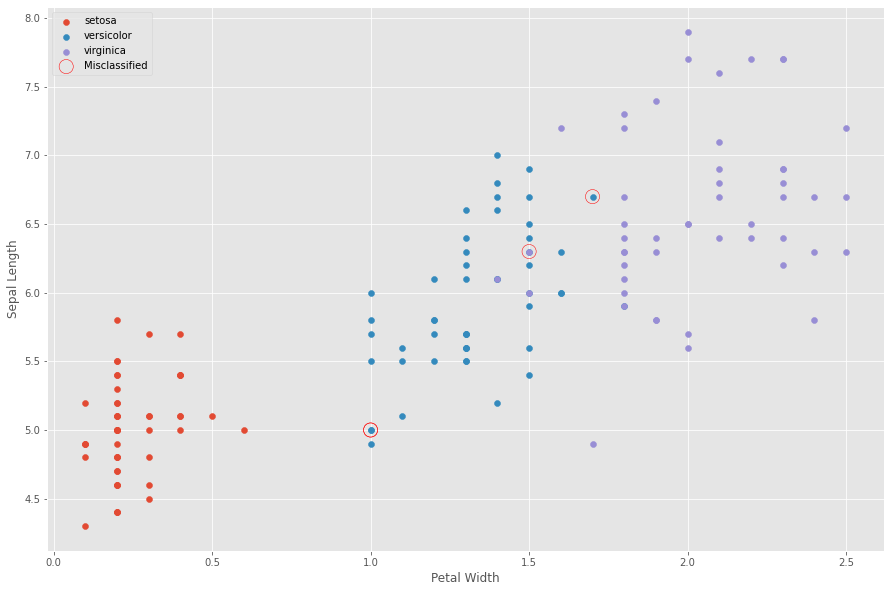

In [33]:
fig, ax = plt.subplots()

#plot training data
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'],data['sepal_length'],label = species)
    
#plot missclassified
ax.scatter(misclass['petal_width'],misclass['sepal_length'],s=200,facecolor='none',edgecolor='r',label='Misclassified')

#legend
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.legend();  

    

## Seperating Setosa

From [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

$$\ell = \log_b \frac{p}{1-p}= \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

***

In [34]:
#give inputs and outputs convienent names
inputs = train[['sepal_length','petal_width']]

#set bersicolor and virginica to 'other'
outputs = train['species'].apply(lambda x:x if x == 'setosa' else'other')

#eyeball outputs
outputs.unique

<bound method Series.unique of 105     other
116     other
75      other
68      other
25     setosa
        ...  
65      other
53      other
145     other
0      setosa
50      other
Name: species, Length: 112, dtype: object>

In [35]:
#create new classifier
lre = lm.LogisticRegression(random_state=0)

#train classifier
lre.fit(inputs,outputs)

LogisticRegression(random_state=0)

In [36]:
actual = test['species'].apply(lambda x :x if x == 'setosa' else 'other')

#how many correct
lre.score(test[['sepal_length', 'petal_width']],actual)

1.0

## Using all possible inputs

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

***

In [37]:
#reload data
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv')

In [38]:
#split data frame in two
train, test = mod.train_test_split(df)
#25% SPLIT BE DEFAULT

In [39]:
#use all four possible inputs
inputs,outputs = train[['sepal_length','sepal_width','petal_length','petal_width']],train['species']

In [40]:
#create new classifier
lre = lm.LogisticRegression(random_state=0)

#train classifier
lre.fit(inputs,outputs)

C:\Users\Oriordanc\Anaconda3a\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [41]:
predictions = lre.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])
predictions

array(['virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor'], dtype=object)

In [42]:
(predictions == test['species']).value_counts()

True     33
False     5
Name: species, dtype: int64

In [43]:
lre.score(test[['sepal_length','sepal_width','petal_length','petal_width']],test['species'])

0.868421052631579

## $k$ Nearsest Neighbours Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

***

In [44]:
#reload data
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv')

In [45]:
#split data frame in two
train, test = mod.train_test_split(df)
#25% SPLIT BE DEFAULT

In [46]:
#use all four possible inputs
inputs,outputs = train[['sepal_length','sepal_width','petal_length','petal_width']],train['species']

In [47]:
#classifier
knn = nei.KNeighborsClassifier()

In [48]:
#fit
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [49]:
#test
knn.score(test[['sepal_length','sepal_width','petal_length','petal_width']],test['species'])

0.9210526315789473

In [50]:
#predict
predictions = knn.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])
predictions
(predictions == test['species']).value_counts()

True     35
False     3
Name: species, dtype: int64

In [51]:
(predictions == test['species']).value_counts(normalize=True)

True     0.921053
False    0.078947
Name: species, dtype: float64

## Cross Validation

https://scikit-learn.org/stable/modules/cross_validation.html

***

In [58]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn,df[['sepal_length','sepal_width','petal_length','petal_width']],df['species'])
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [59]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294


In [60]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre,df[['sepal_length','sepal_width','petal_length','petal_width']],df['species'])
scores

C:\Users\Oriordanc\Anaconda3a\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Oriordanc\Anaconda3a\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [61]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294
